# Assumptions for Linear Regression

## Introduction

Like any other statistical technique, the coefficients and p-values of a linear regression model are based on underlying assumptions about the variables and the relationships between them. In this lesson, you will learn about these assumptions.

## Objectives

You will be able to:

- Explain why linear regression assumptions are important
- List the assumptions of linear regression

## Regression Assumptions and Model Diagnostics

When you fit a regression model, the algorithm will find a best fit line **according to how you have defined the model**. If the model is ill-defined, you will still get coefficients and p-values, but they might not actually describe the true relationship between the underlying variables.

For example, let's say you fit this model:

where am I defining the model? am I changing the parameters of OLS? Why wouldn't I just use the formula? doesn't the library or code automatically build in the formula, why would I change that?

Here's what I could find on the internet:

When fitting a regression model, such as a linear regression, you're essentially trying to find the "best-fit" line that describes the relationship between the independent variable(s) (e.g., X) and the dependent variable (e.g., Y). The best-fit line minimizes the overall difference between the observed Y values and the predicted Y values from the model.

However, the accuracy and meaningfulness of the best-fit line depend on how well the chosen model represents the true relationship in the underlying data.

Example:

Let's say we want to predict the score a student might get on a test (Y) based on the number of hours they studied (X). We decide to use a linear regression model to make this prediction.

Well-Defined Model:
Model: Y (Test Score) = β₀ (intercept) + β₁ (slope) * X (Hours of Study)
If the true relationship is linear (i.e., more study hours lead to a higher test score), this model is well-defined.

Ill-Defined Model:
Model: Y (Test Score) = β₀ (intercept) * X (Hours of Study)
Here, we've omitted the term β₁ (slope), making the model ill-defined.
The coefficients and p-values might still be computed, but they won't accurately represent the true relationship between study hours and test score since the model is incorrect.


The statement emphasizes that even if the model is ill-defined, you'll still get numerical results (coefficients, p-values) from the fitting process. However, these results won't accurately describe the actual relationship between the variables. It's crucial to ensure that the model you define is appropriate and accurately represents the relationship you're trying to capture. The interpretation of these results must be done in the context of a well-defined and meaningful model.

In [1]:
import numpy as np
import statsmodels.api as sm

X = np.linspace(1, 10).reshape(-1, 1)
y = np.exp(X)

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(f"""
Model p-value:   {results.f_pvalue}
Model R-Squared: {results.rsquared}
Coef p-value:    {results.pvalues[1]}
Coef value:      {results.params[1]}
""")


Model p-value:   5.1201996804078596e-09
Model R-Squared: 0.5124264403042176
Coef p-value:    5.120199680407825e-09
Coef value:      1341.4381373622189



Ok, so you are explaining about 51% of the variance in `y`, and for each increase of 1 in `X` you see an associated increase of about 1.3k in `y`. The model overall and the coefficient for `X` are statistically significant.

Other than the fact that these are made-up variables, what's the problem here?

Well, let's look at the graph:

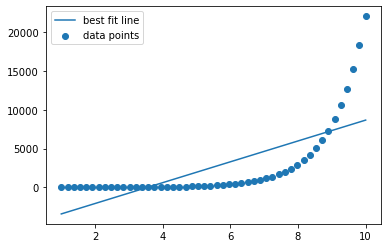

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X, y, label="data points")
ax.plot(X, results.predict(sm.add_constant(X)), label="best fit line")
ax.legend();

Just by looking at that graph, you can tell that this model is not actually a good fit for the data. The ordinary least squares algorithm found a line that would maximize the explained error, but that doesn't mean you would actually want to use this model for inference _or_ prediction.

Linear regression assumptions formalize the ways that a model can be "off" and give you tools beyond just visualization in order to diagnose the problem!

"What are the assumptions of linear regression?" is also a common technical interview question, so we recommend that you use the acronym LINE to remember them: **L**inearity, **I**ndependence, **N**ormality, **E**qual Variance (Homoscedasticity).

## 1. Linearity

> The linearity assumption requires that there is a **linear relationship** between the response variable (y) and predictor (X). Linear means that the change in y by 1-unit change in X, is constant. 


<img src="images/lin_2.png" width="800">

As shown above, if we try to fit a linear model to a non-linear data set, OLS will fail to capture the trend mathematically, resulting in an inaccurate relationship.

## 2. Independence

The independence assumption has two parts: independence of features and independence of errors.

### Independence of Features

> Independence of features means that we want to **avoid collinearity** between features in a multiple regression.

Collinearity means that the _features_ can be used to predict each other, which causes numerical problems for the regression algorithm and leads to unstable coefficients.

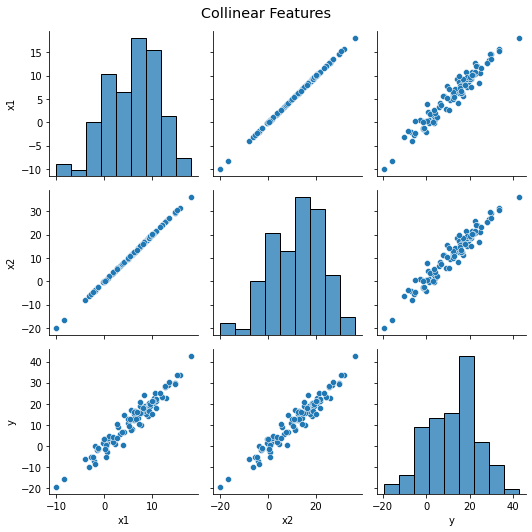

In [3]:
import seaborn as sns
import pandas as pd

np.random.seed(1)
df = pd.DataFrame()
df["x1"] = np.linspace(1, 10, 100) + np.random.normal(scale=5, size=100)
df["x2"] = df["x1"] * 2 # x2 is just a linear transformation of x1
df["y"] = df["x2"] + np.random.normal(scale=3, size=100)

plot = sns.pairplot(df)
plot.fig.suptitle("Collinear Features", fontsize="x-large")
plot.fig.tight_layout();

In addition to collinearity (where one predictor variable linearly predicts another), you also want to **avoid multicollinearity**. Multicollinearity means that multiple predictors can come together to linearly predict one of the predictors. This is more challenging to visualize but we will introduce numerical approaches to assess it.

Collinearity, also known as multicollinearity, is indeed a challenge in regression analysis where predictor variables (features) are highly correlated with each other. It can cause numerical instability and make it difficult to separate the individual effects of each predictor on the target variable. Here's how you can spot and address collinearity:

Spotting Collinearity:

1. Correlation Matrix:
Create a correlation matrix of the predictors. High correlation coefficients (close to 1 or -1) indicate potential collinearity.
2. Variance Inflation Factor (VIF):
Calculate the VIF for each predictor. VIF assesses how much the variance of an estimated regression coefficient increases due to collinearity. VIF values above a certain threshold (typically 10) suggest collinearity.
3. Tolerance:
Tolerance is the reciprocal of the VIF. Low tolerance values (close to 0) indicate collinearity.

Dealing with Collinearity:

1. Feature Selection:
Remove one of the variables from a highly correlated pair if they convey similar information. Choose the one that is more theoretically relevant or has a stronger association with the target variable.
2. Combine Variables:
Create new variables by combining or averaging the highly correlated variables. This can help preserve the valuable information while reducing collinearity.
3. Regularization:
Use regularization techniques like Ridge Regression or Lasso Regression. These methods add a penalty for large coefficients, effectively reducing their impact and mitigating the effects of collinearity.
4. Principal Component Analysis (PCA):
Apply PCA to transform the correlated variables into a new set of uncorrelated variables (principal components).
5. Partial Least Squares (PLS):
PLS regression is an alternative to traditional regression that deals well with multicollinearity by finding a set of new features that are a linear combination of the original features.
6. Domain Knowledge:
Leverage domain knowledge to understand if the collinearity is meaningful or expected based on the context. In some cases, high correlations might be natural and not indicative of a problem.
7. Collect More Data:
Sometimes, collecting additional data can help reduce collinearity by providing a more diverse set of observations.

Remember, the goal is to address collinearity without losing important information. The specific approach you choose will depend on the dataset, the context of the problem, and your understanding of the variables involved. It's often a combination of these techniques that effectively manages collinearity in regression models.

VIF (Variance Inflation Factor):
VIF is a measure of how much the variance of an estimated regression coefficient increases when your predictors are correlated.
If you suspect multicollinearity, calculate the VIF for each predictor variable. A high VIF (typically above 10) indicates multicollinearity.

Regression Coefficients and Interpretation:
In regression, if you have multicollinearity, the estimated coefficients might be unstable and difficult to interpret accurately.
If you have strong multicollinearity, small changes in the data can lead to vastly different estimated coefficients.

Context:
Consider the context and domain knowledge. If high correlations are expected due to the nature of the variables (e.g., height and weight), it might not indicate a problem with multicollinearity.

### Independence of Errors

> Independence of errors means we want to **avoid autocorrelation** of errors. Autocorrelation means that a variable is correlated with itself, so that later values can be predicted based on previous values.

If a variable is autocorrelated then a _time series_ modeling approach is likely more appropriate than linear regression.

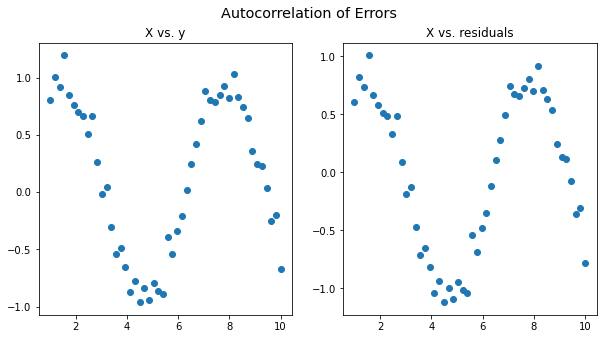

In [4]:
y = np.sin(X) + np.random.normal(scale=0.1, size=50).reshape(-1, 1)

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

fig, axes = plt.subplots(ncols=2, figsize=(10,5))
axes[0].scatter(X, y)
axes[0].set_title("X vs. y")
axes[1].scatter(X, y.reshape(1, -1) - results.predict(sm.add_constant(X)))
axes[1].set_title("X vs. residuals")
fig.suptitle("Autocorrelation of Errors", fontsize="x-large");

1. Independence of Errors:
In linear regression, one of the assumptions is that the errors (residuals) should be independent of each other. This means that the error for one observation should not provide any information about the error for another observation. Essentially, the errors are not correlated.

Example:
Suppose we're studying the impact of hours of study (X) on exam scores (Y). Here's a hypothetical dataset:

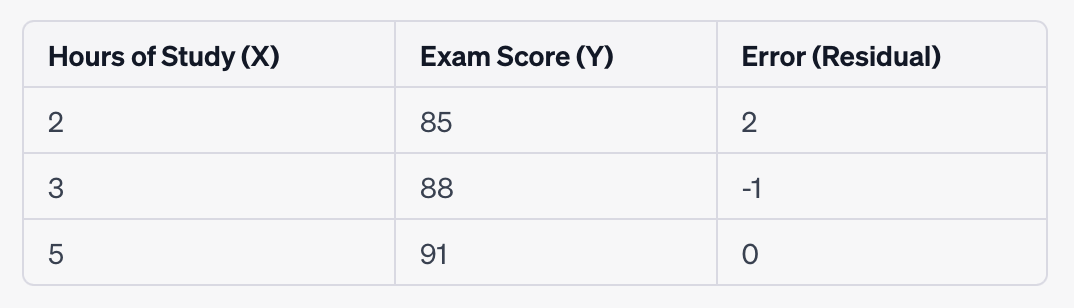


In this example, the errors (residuals) are 2, -1, and 0 for each respective observation. The errors are independent if knowing the error for one observation doesn't provide any information about the error for another observation.



2. Autocorrelation of Errors:
Autocorrelation occurs when the errors in a time series model (or any sequential data) are correlated with themselves. This means that the error at a given time is related to the error at a previous time.

Example:
Let's consider a daily temperature dataset for a week. The errors (residuals) could represent the deviation of the observed temperature from the predicted temperature.

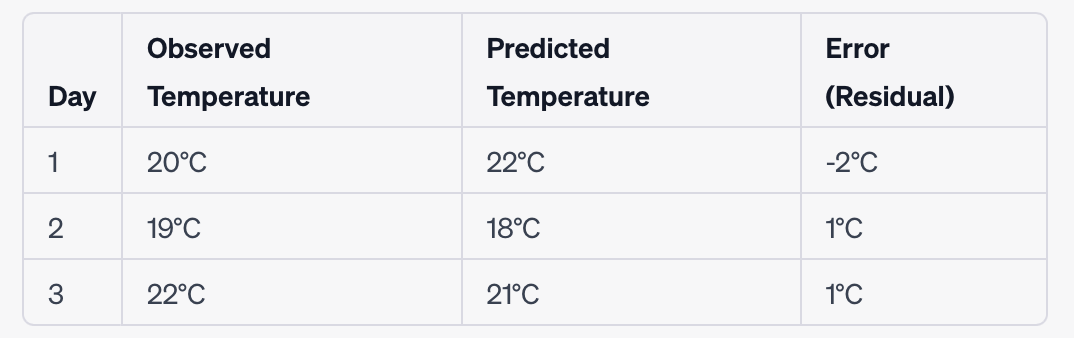


Day	Observed Temperature	Predicted Temperature	Error (Residual)
1	20°C	22°C	-2°C
2	19°C	18°C	1°C
3	22°C	21°C	1°C
If the error for a specific day is influenced by the error from the previous day (e.g., higher temperature errors tend to follow other high temperature errors), it suggests autocorrelation.

3. Time Series Modeling Approach:
If we observe autocorrelation in the errors, it indicates that the data may have a time-dependent structure. In such cases, using a time series modeling approach (e.g., ARIMA, SARIMA) might be more appropriate than traditional linear regression.

Example:
Let's say we have daily temperature data for a year and we observe that the errors show a pattern related to the errors of previous days. In this case, using a time series model to account for this pattern would be a better approach than a simple linear regression.

In summary, independence of errors is a key assumption in linear regression, ensuring that errors are not correlated. Autocorrelation of errors suggests a time-dependent structure and might require a time series modeling approach to effectively model the data.

## 3. Normality 


> The normality assumption states that the **model residuals** should follow a normal distribution

Note that the normality assumption talks about the model residuals and _not_ about the distributions of the variables! In general, data scientists will often check the distributions of the variables as well.

<img src="images/inhouse_histo.png" width="800">

## 4. Equal Variance: Homoscedasticity 

> The equal variance (homoscedasticity) assumption states that we want to **avoid heteroscedasticity** of the errors

_Heteroscedasticity_ (also spelled heteroskedasticity) refers to the circumstance in which a variable's variability is unequal across the range of values of the predictor(s).

When there is heteroscedasticity in the data, a scatter plot of these variables will often create a cone-like shape. The scatter of the errors widens or narrows as the value of the independent variable increases. 

The inverse of heteroscedasticity is _homoscedasticity_, which indicates that a variable's variability is equal across values of the independent variable.

<img src="images/homo_2.png" width="700">

## Diagnostics with Residuals

Looking at the residuals is the single best way to flag potential violations of linear regression assumptions and figure out what to do about them. In the upcoming lessons you will learn more concrete approaches (e.g. statistical tests) that will tell you _whether_ an assumption is being met, but plotting residuals is likely to help you figure out _why_ this is happening.

Below are some general shapes of residual plots that you should be aware of:

<img src="images/prob_2.png" width="700">

## Summary 

Linear regression assumptions underpin the validity and reliability of your model. The algorithm will find _some_ coefficients and p-values, but their validity depends on the model being appropriately specified. The four assumptions can be remembered using the acronym LINE: linearity, independence, normality, and equal variance (homoscedasticity). In upcoming lessons we'll get into more detail about how to measure regression assumptions.